# Импорты библиотек

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Добавьте необходимые библиотеки здесь

# Чтение данных

In [2]:
df_path = "videostreaming_platform.csv"

df = pd.read_csv(df_path)

print('=== Предварительный анализ данных: ===')
print('Первые 5 строк таблицы:')
df.head()

=== Предварительный анализ данных: ===
Первые 5 строк таблицы:


,user_id,start_trial_date,city,device,source,favourite_genre,avg_min_watch_daily,number_of_days_logged,churn
0,d1b6ef34-1991-452a-8c39-c83c0d5805fe,2024-02-01,St Petersburg,ios,performance,drama,2.076642,4,1
1,f1bf2396-73d8-461e-a775-9f068bd99326,2024-02-01,Other,web,seo,criminal,5.101392,1,1
2,ec9fa0be-4bd8-4fe6-910a-e9e6d4bbba28,2024-02-01,Ufa,web,performance,criminal,2.906597,1,1
3,b0195e96-af2e-4ac3-8f60-26b8d862af84,2024-02-01,Moscow,smarttv,seo,thriller,2.702388,6,0
4,a208985a-7244-4291-8d38-64c8141e27b2,2024-02-01,Ufa,web,performance,thriller,10.237305,1,1


In [3]:
print("Обща информация о датасете:")
df.info()

Обща информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                28000 non-null  object 
 1   start_trial_date       28000 non-null  object 
 2   city                   27692 non-null  object 
 3   device                 28000 non-null  object 
 4   source                 28000 non-null  object 
 5   favourite_genre        20048 non-null  object 
 6   avg_min_watch_daily    28000 non-null  float64
 7   number_of_days_logged  28000 non-null  int64  
 8   churn                  28000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.9+ MB


In [4]:
print("Размер датасета:")
df.shape

Размер датасета:


(28000, 9)

In [5]:
print("Количество пользователей:")
df['user_id'].nunique()

Количество пользователей:


28000

In [6]:
print('Статистика по числовым переменным:')
df.describe()

Статистика по числовым переменным:


,avg_min_watch_daily,number_of_days_logged,churn
count,28000.000000,28000.00000,28000.000000
mean,7.812663,1.88600,0.789286
std,7.739760,1.48293,0.407823
min,0.000181,1.00000,0.000000
25%,2.521966,1.00000,1.000000
50%,5.419012,1.00000,1.000000
75%,10.487946,2.00000,1.000000
max,80.072401,7.00000,1.000000


In [7]:
print("Пропущенные значения:")
df.isnull().sum()

Пропущенные значения:


user_id                     0
start_trial_date            0
city                      308
device                      0
source                      0
favourite_genre          7952
avg_min_watch_daily         0
number_of_days_logged       0
churn                       0
dtype: int64

# Чистка данных

In [8]:
# Ваш код здесь
# Создание копии для работы
df_clean = df.copy()

# Обработка пропусков
df_clean['city'] = df_clean['city'].fillna('Unknown')
df_clean['favourite_genre'] = df_clean[
    'favourite_genre'
].fillna('not_selected')

# Создание новых признаков
# Преобразование даты
df_clean['start_trial_date'] = pd.to_datetime(df_clean['start_trial_date'])

# Преобразование ушедших (churn), ушел = True, не ушел - False
df_clean['churn'] = df_clean['churn'].astype(bool)


# Создание бинарных признаков

# В логике, что некоторым все равно, что смотреть.
df_clean['is_genre_selected'] = (
    df_clean['favourite_genre'] != 'not_selected'
).astype(bool)

# Крупные города vs остальная Россия (тут возможна корреляция с девайсами)
df_clean['is_top_city'] = df_clean['city'].isin(
    ['Moscow', 'St Petersburg']
).astype(bool)

# Категория тех, кто побогаче
df_clean['is_smarttv_or_ios'] = df_clean['device'].isin(
    ['smarttv', 'ios']
).astype(bool)

# Категория тех, кто в движении (студенты?)
df_clean['is_mobile'] = df_clean['device'].isin(
    ['android', 'ios']
).astype(bool)

# Каегория тех, кто живет промо акциями
df_clean['is_performance_source'] = (
    df_clean['source'] == 'performance'
).astype(bool)

# Создание категорий по времени просмотра
df_clean['watch_time_category'] = pd.cut(
    df_clean['avg_min_watch_daily'],
    bins=[0, 2, 10, 30, 100],
    labels=['very_low', 'low', 'medium', 'high'],
    include_lowest=True
)

# Расчет общего времени просмотра
df_clean['total_watch_time'] = (
    df_clean['avg_min_watch_daily'] * df_clean['number_of_days_logged']
)
df_clean.head()

,user_id,start_trial_date,city,device,source,favourite_genre,avg_min_watch_daily,number_of_days_logged,churn,is_genre_selected,is_top_city,is_smarttv_or_ios,is_mobile,is_performance_source,watch_time_category,total_watch_time
0,d1b6ef34-1991-452a-8c39-c83c0d5805fe,2024-02-01,St Petersburg,ios,performance,drama,2.076642,4,True,True,True,True,True,True,low,8.306568
1,f1bf2396-73d8-461e-a775-9f068bd99326,2024-02-01,Other,web,seo,criminal,5.101392,1,True,True,False,False,False,False,low,5.101392
2,ec9fa0be-4bd8-4fe6-910a-e9e6d4bbba28,2024-02-01,Ufa,web,performance,criminal,2.906597,1,True,True,False,False,False,True,low,2.906597
3,b0195e96-af2e-4ac3-8f60-26b8d862af84,2024-02-01,Moscow,smarttv,seo,thriller,2.702388,6,False,True,True,True,False,False,low,16.214331
4,a208985a-7244-4291-8d38-64c8141e27b2,2024-02-01,Ufa,web,performance,thriller,10.237305,1,True,True,False,False,False,True,medium,10.237305


            city  churn_rate
8  Yekaterinburg    0.806418
6            Ufa    0.802058
3          Other    0.800752
0      Krasnodar    0.789515
9            NaN    0.788961
7       Voronezh    0.786990
1         Moscow    0.786859
2    Novosibirsk    0.785359
4         Samara    0.784115
5  St Petersburg    0.779911


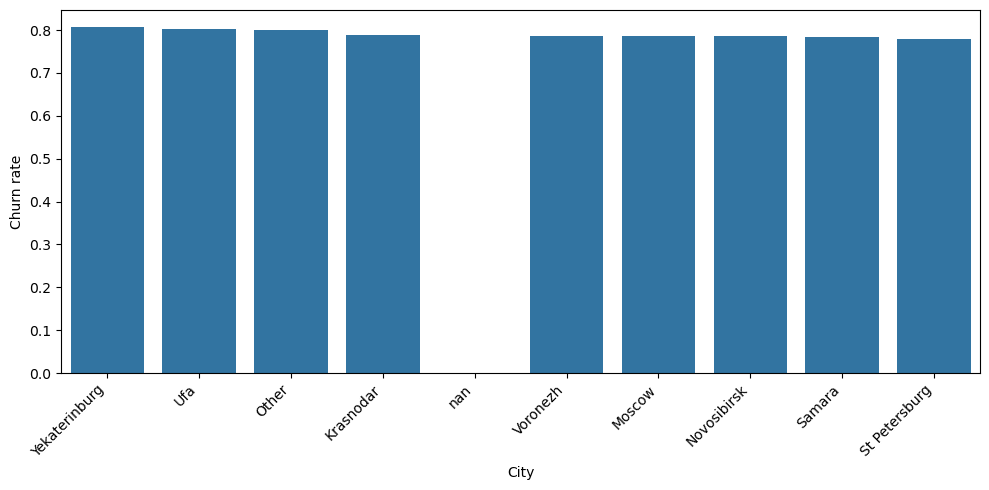

In [12]:
#Отказы по городам
city_cr = (
    df.groupby('city', dropna=False)['churn']
      .mean()
      .reset_index(name='churn_rate')
    # опционально отсортировать по убыванию
      .sort_values('churn_rate', ascending=False)
)

print(city_cr)
plt.figure(figsize=(10, 5))
sns.barplot(
    data=city_cr,
    x='city',
    y='churn_rate',
    order=city_cr['city']  # чтобы сохранить сортировку
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Churn rate')
plt.xlabel('City')
plt.tight_layout()
plt.show()

C:\Users\Тихон\AppData\Local\Temp\ipykernel_19528\1134471058.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('watch_cohort')['churn']


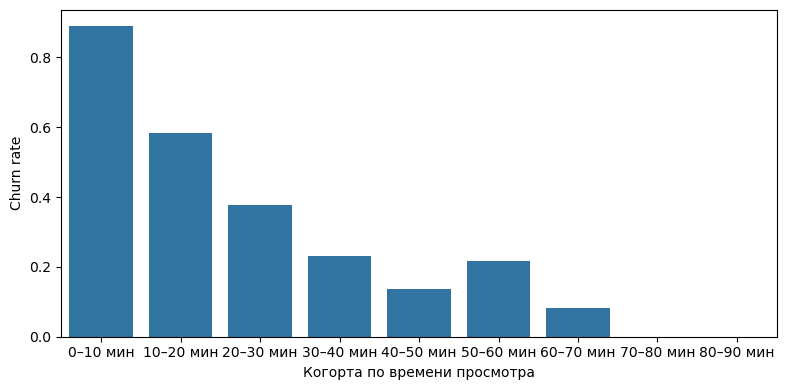

In [20]:
#отказы по времени просмотра
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['0–10 мин', '10–20 мин','20–30 мин','30–40 мин', '40–50 мин','50–60 мин','60–70 мин','70–80 мин','80–90 мин']

df['watch_cohort'] = pd.cut(
    df['avg_min_watch_daily'],
    bins=bins,
    labels=labels,
    right=False  # интервал [0,10)
)
cohort_stats = (
    df.groupby('watch_cohort')['churn']
      .mean()
      .reset_index(name='churn_rate')
      .sort_values('watch_cohort')
)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=cohort_stats,
    x='watch_cohort',
    y='churn_rate'
)
plt.xlabel('Когорта по времени просмотра')
plt.ylabel('Churn rate')
plt.tight_layout()
plt.show()


# Гипотезы

In [23]:
# Укажите список + стратегию проверки